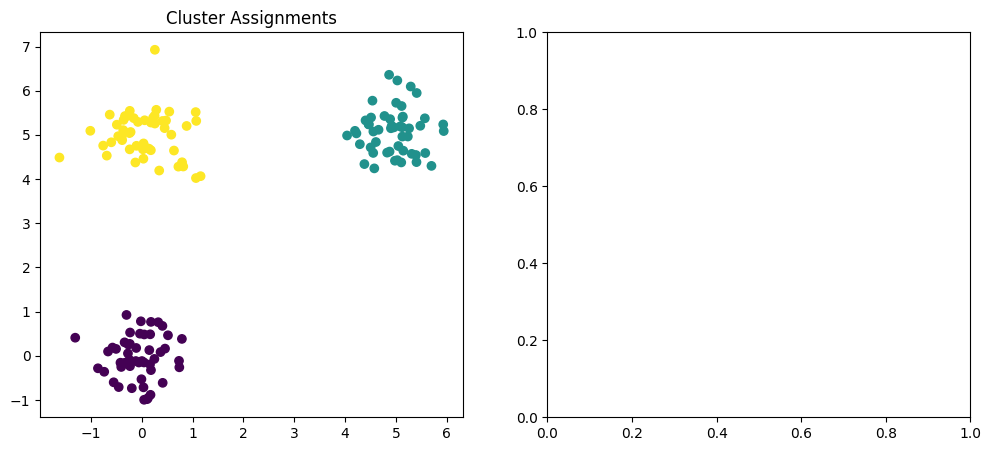

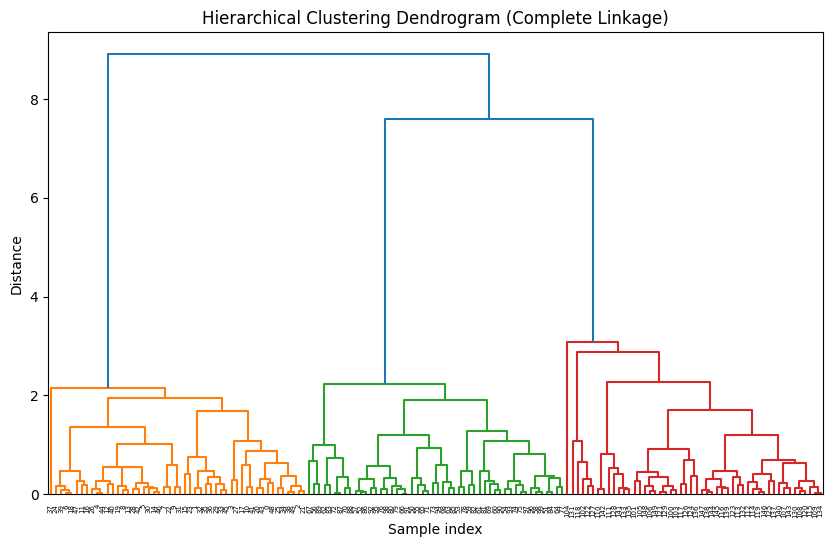

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

class HierarchicalClustering:
    def __init__(self, n_clusters=2, linkage='complete'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None
        self.linkage_matrix_ = None

    def fit(self, X):
        # Compute condensed distance matrix
        dist_matrix = pdist(X)

        # Perform hierarchical clustering using SciPy's linkage
        self.linkage_matrix_ = linkage(dist_matrix, method=self.linkage)

        # Extract cluster labels by cutting the dendrogram
        from scipy.cluster.hierarchy import fcluster
        self.labels_ = fcluster(self.linkage_matrix_, t=self.n_clusters, criterion='maxclust') - 1

    def plot_dendrogram(self):
        if self.linkage_matrix_ is None:
            raise ValueError("Model has not been fitted yet.")

        plt.figure(figsize=(10, 6))
        dendrogram(self.linkage_matrix_)
        plt.title(f'Hierarchical Clustering Dendrogram ({self.linkage.capitalize()} Linkage)')
        plt.xlabel('Sample index')
        plt.ylabel('Distance')
        plt.show()

# Generate sample data
np.random.seed(42)
X = np.concatenate([
    np.random.normal(loc=[0, 0], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[5, 5], scale=0.5, size=(50, 2)),
    np.random.normal(loc=[0, 5], scale=0.5, size=(50, 2))
])

# Perform clustering
hc = HierarchicalClustering(n_clusters=3, linkage='complete')
hc.fit(X)

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=hc.labels_, cmap='viridis')
plt.title('Cluster Assignments')

# Plot dendrogram
plt.subplot(1, 2, 2)
hc.plot_dendrogram()
plt.tight_layout()
plt.show()